In [1]:
import pyclesperanto_prototype as cle
from numpy import random
from skimage.io import imshow

# Get a test label image

In [2]:
pointlist = cle.push_zyx(random.random((2,25)) * 200) 
print(pointlist)

[[191.74503    90.11498   180.70862   121.19386    71.90925    84.62808
  182.3788     95.6364    196.84749   176.95425   144.75409   193.82361
  112.42955   127.16978    37.90602    74.631096  186.80553     0.409472
  182.47652    16.401989   30.765274  105.3301    154.22278    78.19475
  144.3033   ]
 [194.33144    73.40758   146.66458     7.3030534 125.40269   121.36054
   19.522312  146.65701    10.870085  155.56772    99.07795    80.85451
   21.268576   19.805975  162.26152    58.635773    1.6762592  37.841335
   72.946915   87.64162    90.26011   108.98451   141.73877   195.06473
  180.40976  ]]


c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


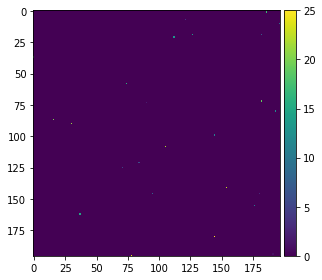

In [3]:
labelled_spots = cle.pointlist_to_labelled_spots(pointlist)
imshow(cle.pull_zyx(labelled_spots))

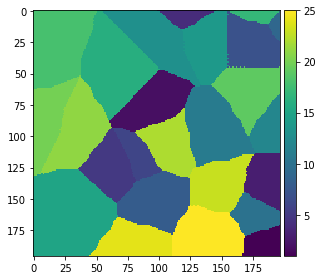

In [4]:
cells = cle.extend_labeling_via_voronoi(labelled_spots)
imshow(cle.pull_zyx(cells))

# Analyze and visualize distances between labelled objects

In [5]:
centroids = cle.label_centroids_to_pointlist(cells)
print(centroids)

[[183.04762    96.28571   184.09932   120.895836   60.794464   83.08477
  173.61215    98.240715  193.08888   176.25974   144.0355    186.71373
   97.88094   138.97937    28.525873   64.157394  177.59375    20.607765
  171.76048    11.921341   35.626587  109.19315   148.0564     80.214485
  138.51642  ]
 [185.2449     73.25858   134.03603     4.953125  125.25813   114.78278
   26.905874  152.05547    12.340741  162.96812    93.18893    95.35492
   23.434101   28.5775    162.26636    43.95828     3.7083333  27.309032
   64.73782    86.77018    95.64913   107.35959   138.0564    183.49786
  178.30933  ]]


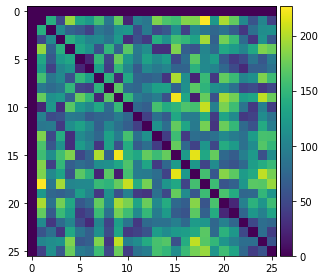

In [6]:
distance_matrix = cle.generate_distance_matrix(centroids, centroids)
imshow(cle.pull_zyx(distance_matrix))

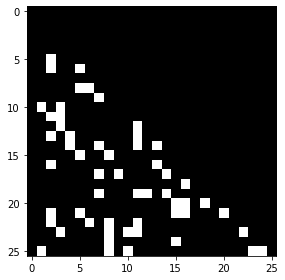

In [7]:
touch_matrix = cle.generate_touch_matrix(cells)
imshow(cle.pull_zyx(touch_matrix))

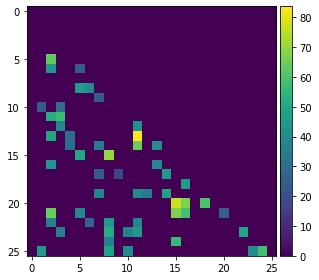

In [8]:
touch_distance_matrix = cle.multiply_images(touch_matrix, distance_matrix)
imshow(cle.pull_zyx(touch_distance_matrix))

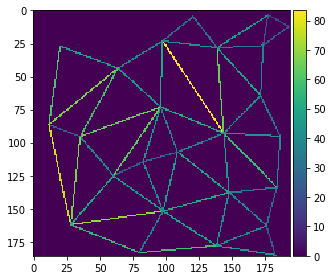

In [9]:
distance_mesh = cle.touch_matrix_to_mesh(centroids, touch_distance_matrix)
imshow(cle.pull_zyx(distance_mesh))

In [10]:
# Sepcial meshes
## Mesh of touching neighbors

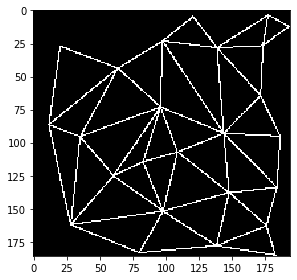

In [11]:
angle_mesh = cle.touch_matrix_to_mesh(centroids, touch_matrix)
imshow(cle.pull_zyx(angle_mesh))

## Mesh nearest neighbors

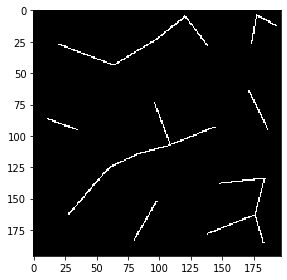

In [12]:
nearest_neighbor_mesh = cle.draw_mesh_between_n_closest_labels(cells, n=1)
imshow(cle.pull_zyx(nearest_neighbor_mesh))

## Meshes of proximal neighbors/

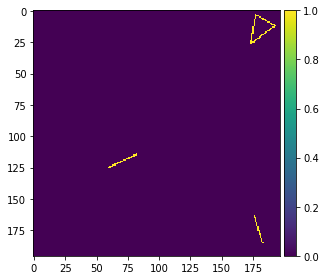

In [13]:
close_neighbors_mesh = cle.draw_mesh_between_proximal_labels(cells, maximum_distance=25)
imshow(cle.pull_zyx(close_neighbors_mesh))

## Distance meshes
This is the same custom mesh as shown in the section on top

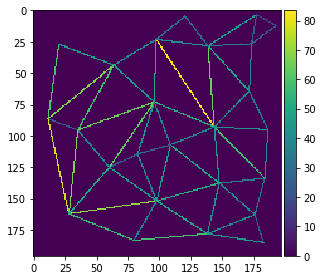

In [14]:
distance_mesh = cle.draw_distance_mesh_between_touching_labels(cells)
imshow(cle.pull_zyx(distance_mesh))

# Angle meshes
An angle mesh describes in which directions lines point. Angles range from -0.5pi to 0.5pi radians or -90 to 90 degrees, respectively. 90 and -90 degrees corresponds to top/bottom, 0 degrees corresponds to right to the left.

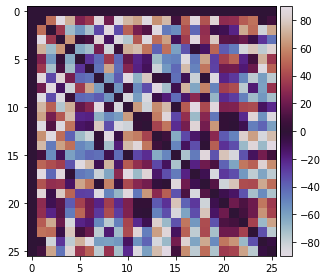

In [15]:
angle_matrix = cle.generate_angle_matrix(centroids, centroids)
# convert
angle_matrix = cle.radians_to_degrees(angle_matrix)
# correct NaNs for visualisation

angle_matrix = cle.undefined_to_zero(angle_matrix)

imshow(cle.pull_zyx(angle_matrix), cmap='twilight')

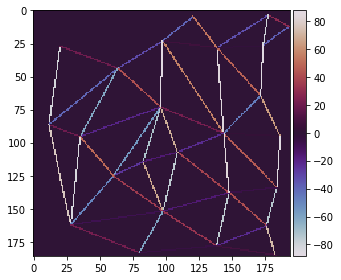

In [16]:
angle_touch_matrix = cle.multiply_images(angle_matrix, touch_matrix)
angle_mesh = cle.touch_matrix_to_mesh(centroids, angle_touch_matrix)
imshow(cle.pull_zyx(angle_mesh), cmap='twilight')